<h1>File Upload Section<h1>

In [ ]:
from google.colab import files

uploaded = files.upload()  # Upload files from local system

Saving bank.csv to bank.csv


<h1>Import Required Libraries<h1>

In [ ]:
# Import classifiers
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Import model selection and evaluation tools
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, f1_score, precision_score, recall_score

# Import dimensionality reduction and feature selection
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.feature_selection import SequentialFeatureSelector

# Import preprocessing and data handling libraries
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt


<h1>Suppress Warnings<h1>

In [ ]:
import warnings

# Disable warning messages in Python
warnings.filterwarnings('ignore')

<h1>Data Preprocessing and Cleaning<h1>

In [ ]:
# Read bank dataset from CSV file
df = pd.read_csv('bank.csv')

# Drop 'month' and 'day' columns
df = df.drop(columns=['month', 'day'])

# Remove duplicate rows from dataframe
df = df.drop_duplicates()

# Convert categorical variables to numeric using One-Hot Encoding
df = pd.get_dummies(df)

# Drop some unnecessary columns
# This line is optional; adjust for best model performance
df = df.drop(columns=['default_no', 'housing_no', 'loan_no', 'deposit_no'])

# Display first 5 rows of dataframe transposed
df.head(5).T


,0,1,2,3,4
age,59,56,41,55,54
balance,2343,45,1270,2476,184
duration,1042,1467,1389,579,673
campaign,1,1,1,1,2
pdays,-1,-1,-1,-1,-1
previous,0,0,0,0,0
job_admin.,True,True,False,False,True
job_blue-collar,False,False,False,False,False
job_entrepreneur,False,False,False,False,False
job_housemaid,False,False,False,False,False


<h1>Define Features and Target<h1>

In [ ]:
# Define independent variables (features)
X = df.drop('deposit_yes', axis=1)

# Define dependent variable (target)
y = df['deposit_yes']

# Display shapes of features and target
X.shape, y.shape

((11162, 35), (11162,))

## Exploratory Data Analysis (EDA)

**Tasks:**

1. Check Summary Statistics for the Dataset
2. Check Distribution Of Classes
3. Check Correlation Matrix
4. Check For Outliers
5. Visualize Data After Dimension Reduction


In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  11162 non-null  int64
 1   balance              11162 non-null  int64
 2   duration             11162 non-null  int64
 3   campaign             11162 non-null  int64
 4   pdays                11162 non-null  int64
 5   previous             11162 non-null  int64
 6   job_admin.           11162 non-null  bool 
 7   job_blue-collar      11162 non-null  bool 
 8   job_entrepreneur     11162 non-null  bool 
 9   job_housemaid        11162 non-null  bool 
 10  job_management       11162 non-null  bool 
 11  job_retired          11162 non-null  bool 
 12  job_self-employed    11162 non-null  bool 
 13  job_services         11162 non-null  bool 
 14  job_student          11162 non-null  bool 
 15  job_technician       11162 non-null  bool 
 16  job_unemployed       1

In [ ]:
# Markdown: Check Missing Values and Summary

def check_missing_values(df):
    # Calculate number of missing values per column
    missing_values = df.isnull().sum()
    
    # Create a dataframe showing columns with missing values
    missing_df = pd.DataFrame({'Feature': missing_values.index, 
                               'Missing Count': missing_values.values})
    
    # Filter only columns that have missing values
    missing_df = missing_df[missing_df['Missing Count'] > 0]

    # Display statistical summary of the dataframe
    # Includes count, mean, std, min, 25%, 50%, 75%, max
    summary = df.describe().T
    summary = summary[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]
    print("\nخلاصه آماری داده‌ها:")
    display(summary)

# Run function to check missing values and display summary
check_missing_values(df)



خلاصه آماری داده‌ها:


,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


<h1>Visualize Target Class Distribution<h1>

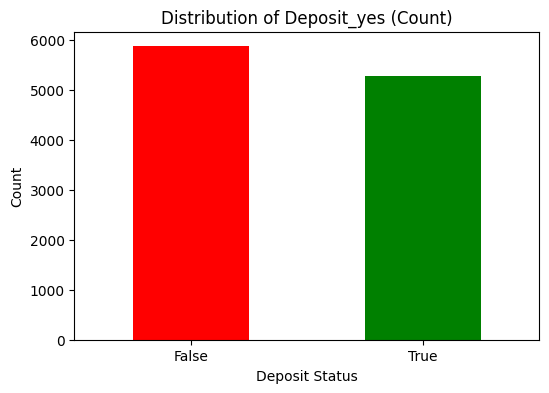

In [ ]:
# Count number of instances in each class
class_counts = df['deposit_yes'].value_counts()

# Set figure size for the plot
plt.figure(figsize=(6, 4))

# Plot bar chart for class counts
class_counts.plot(kind='bar', color=['red', 'green'])

# Set x-axis label
plt.xlabel("Deposit Status")

# Set y-axis label
plt.ylabel("Count")

# Set plot title
plt.title("Distribution of Deposit_yes (Count)")

# Rotate x-axis labels to 0 degrees
plt.xticks(rotation=0)

# Display the plot
plt.show()


<h1>Compute Target Class Distribution Percentage<h1>

In [ ]:
# Calculate percentage distribution of each class
class_distribution = df['deposit_yes'].value_counts(normalize=True) * 100

# Print class distribution percentages
print(class_distribution)

deposit_yes
False    52.616019
True     47.383981
Name: proportion, dtype: float64


<h1>Correlation Matrix Heatmap<h1>

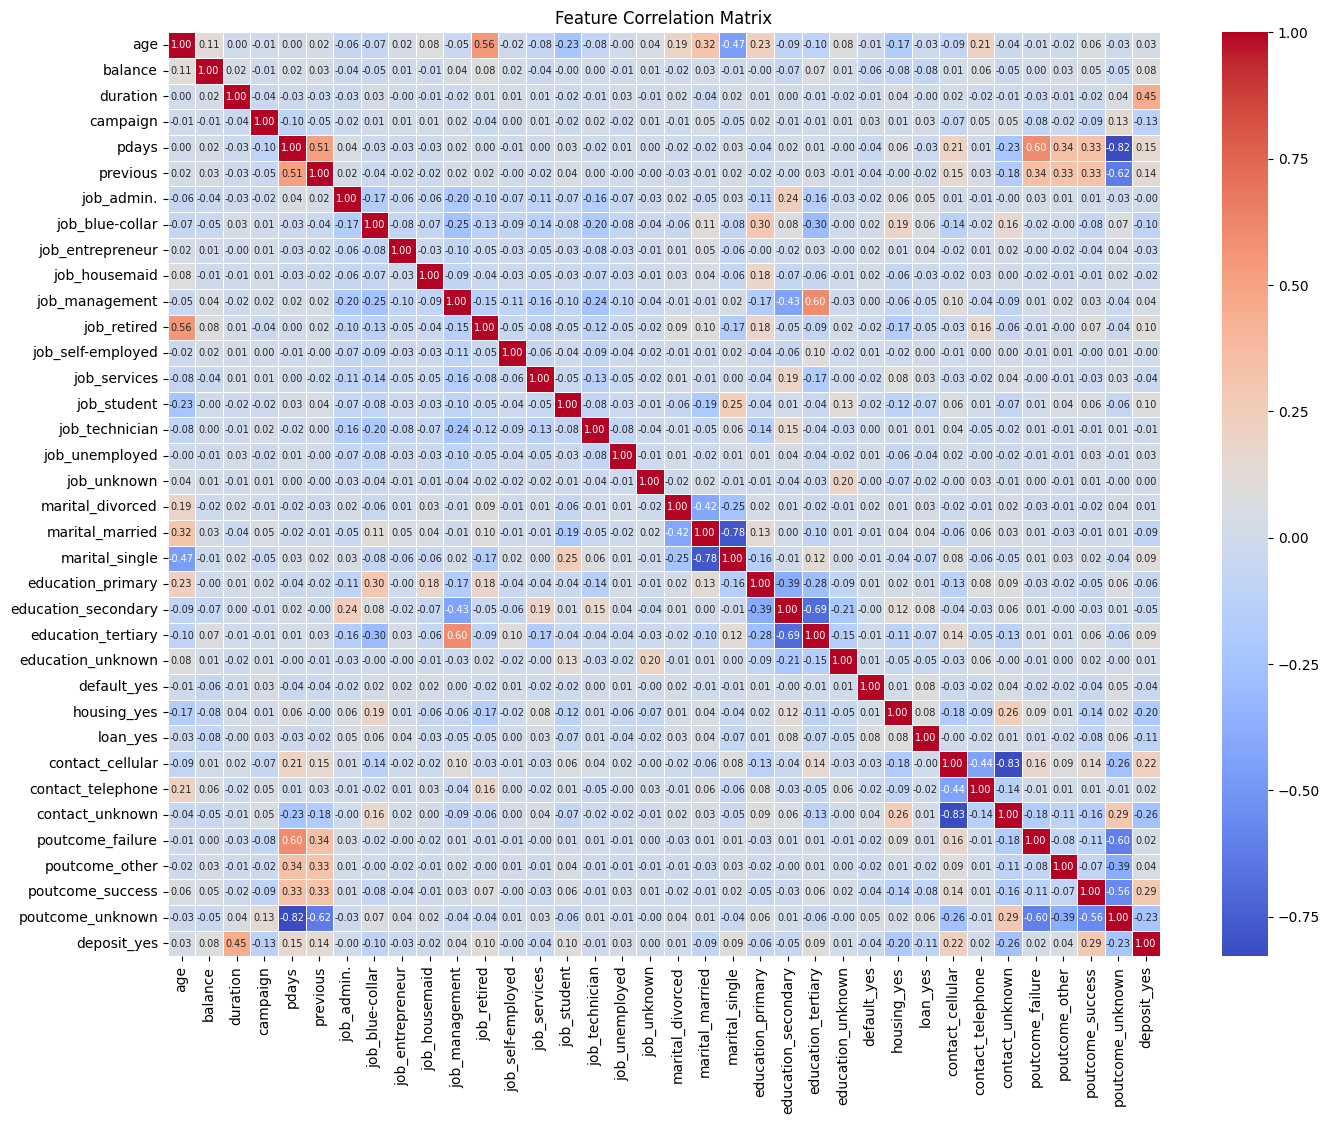

In [ ]:
# Compute correlation matrix to check relationships between features
correlation_matrix = df.corr()

# Set figure size
plt.figure(figsize=(16, 12))

# Plot heatmap of correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm",
            linewidths=0.5, annot_kws={"size": 7})

# Set plot title
plt.title("Feature Correlation Matrix")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Rotate y-axis labels
plt.yticks(rotation=0)

# Display the heatmap
plt.show()

<h1>Boxplot for Outlier Detection<h1>

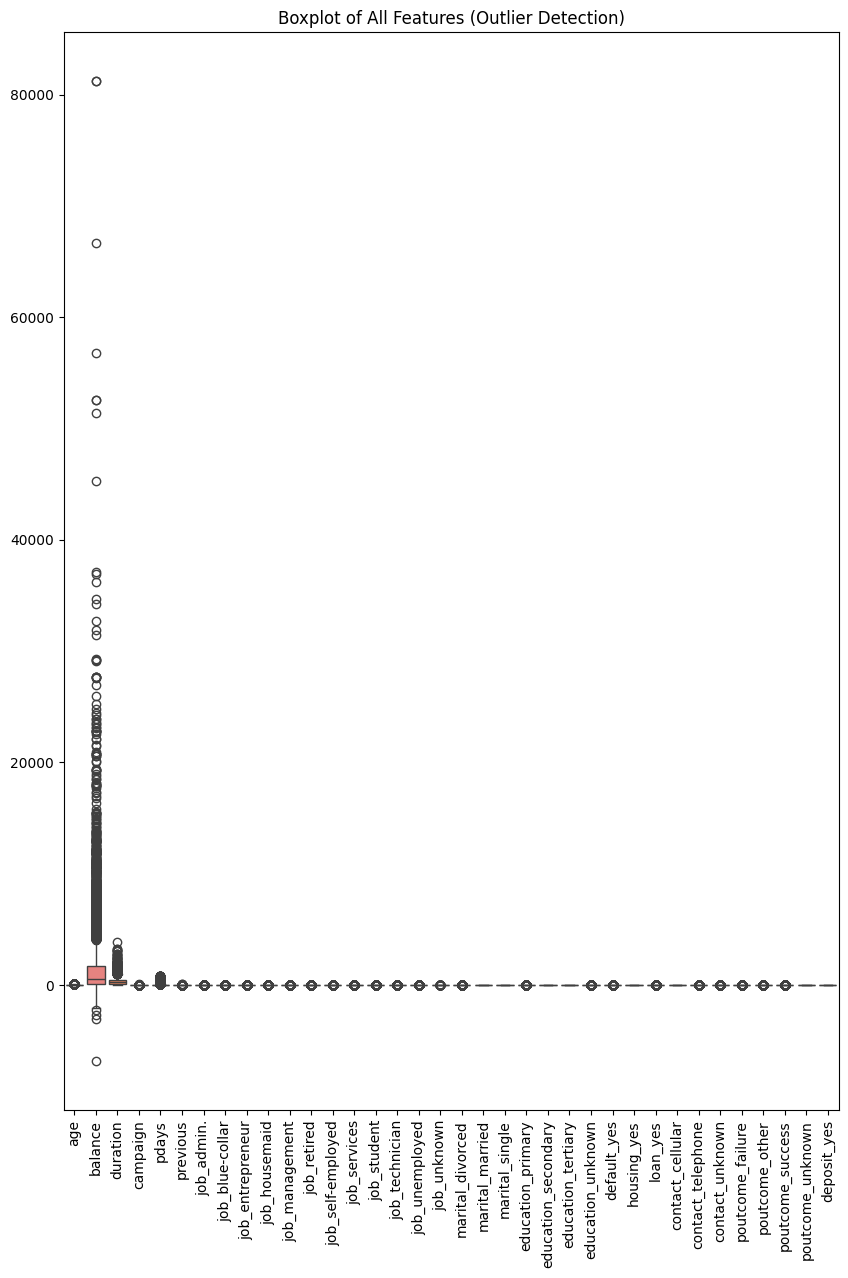

In [ ]:
# Set figure size
plt.figure(figsize=(10, 14))

# Plot vertical boxplot for all features
sns.boxplot(data=df, orient="v")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Set plot title
plt.title("Boxplot of All Features (Outlier Detection)")

# Display the boxplot
plt.show()

<h1>PCA 2D Visualization<h1>

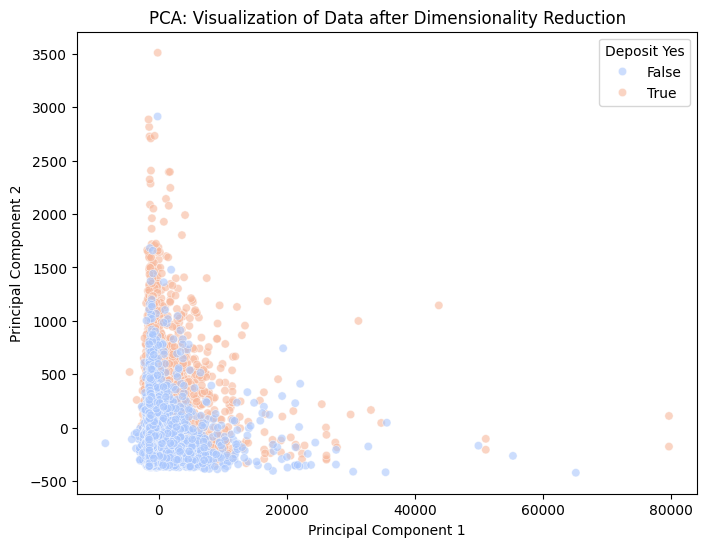

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns

# Select 2 principal components for 2D visualization
pca = PCA(n_components=2)

# Apply PCA only on numeric features
df_pca = pca.fit_transform(df.select_dtypes(include=['number']))

# Convert PCA result to DataFrame
df_pca = pd.DataFrame(df_pca, columns=["PC1", "PC2"])

# Add target class for coloring in the plot
df_pca["deposit_yes"] = df["deposit_yes"]

# Plot 2D scatter plot of PCA components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca["PC1"], y=df_pca["PC2"], 
                hue=df_pca["deposit_yes"], alpha=0.6, palette="coolwarm")

# Set axis labels and title
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA: Visualization of Data after Dimensionality Reduction")

# Display legend and plot
plt.legend(title="Deposit Yes")
plt.show()

<h1>LDA 1D Visualization<h1>

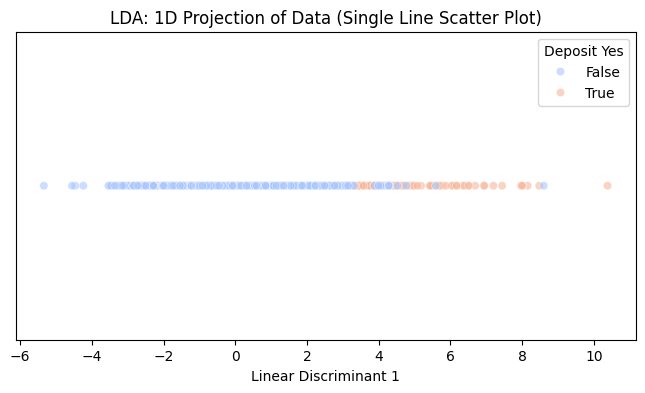

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Apply LDA with 1 component
lda = LinearDiscriminantAnalysis(n_components=1)
df_lda = lda.fit_transform(df.select_dtypes(include=['number']), df["deposit_yes"])

# Convert LDA result to DataFrame
df_lda = pd.DataFrame(df_lda, columns=["LD1"])
df_lda["deposit_yes"] = df["deposit_yes"]

# Plot scatter on a horizontal line
plt.figure(figsize=(8, 4))
sns.scatterplot(x=df_lda["LD1"], y=[0] * len(df_lda), 
                hue=df_lda["deposit_yes"], alpha=0.6, palette="coolwarm")

# Set x-axis label and remove y-ticks
plt.xlabel("Linear Discriminant 1")
plt.yticks([])

# Set plot title and display legend
plt.title("LDA: 1D Projection of Data (Single Line Scatter Plot)")
plt.legend(title="Deposit Yes")
plt.show()

<h1>Train-Test Split<h1>

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = df.drop(columns=["deposit_yes"])
y = df["deposit_yes"]

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Display sizes of training and testing sets
print("Train set size:", X_train.shape, y_train.shape)
print("Test set size:", X_test.shape, y_test.shape)


Train set size: (8929, 35) (8929,)
Test set size: (2233, 35) (2233,)


<h1>Normalize Numeric Features<h1>

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Select only numeric columns
numeric_features = df.select_dtypes(include=['number']).columns

# Normalize data between 0 and 1
scaler = MinMaxScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

# Display summary of normalized training data
print(X_train[numeric_features].describe().T)

           count      mean       std  min       25%       50%       75%  max
age       8929.0  0.300087  0.154235  0.0  0.181818  0.272727  0.402597  1.0
balance   8929.0  0.094596  0.033791  0.0  0.079147  0.084031  0.097001  1.0
duration  8929.0  0.112126  0.105410  0.0  0.041133  0.076478  0.149299  1.0
campaign  8929.0  0.024245  0.044898  0.0  0.000000  0.016129  0.032258  1.0
pdays     8929.0  0.061748  0.127576  0.0  0.000000  0.000000  0.045614  1.0
previous  8929.0  0.014306  0.040196  0.0  0.000000  0.000000  0.017241  1.0


## Learning Models

<h1>SVM Model Evaluation with Cross-Validation<h1>

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import numpy as np

# Define SVM model with RBF kernel
svm_model = SVC(kernel="rbf", probability=True, random_state=42)

# Perform 5-fold cross-validation for different metrics
svm_accuracy = cross_val_score(svm_model, X_train, y_train, cv=5, scoring="accuracy")
svm_precision = cross_val_score(svm_model, X_train, y_train, cv=5, scoring="precision")
svm_recall = cross_val_score(svm_model, X_train, y_train, cv=5, scoring="recall")
svm_f1 = cross_val_score(svm_model, X_train, y_train, cv=5, scoring="f1")

# Display mean and standard deviation of SVM metrics
print("\n🔹 **نتایج SVM (rbf):**")
print(f"Accuracy: {np.mean(svm_accuracy):.4f} ± {np.std(svm_accuracy):.4f}")
print(f"Precision: {np.mean(svm_precision):.4f} ± {np.std(svm_precision):.4f}")
print(f"Recall: {np.mean(svm_recall):.4f} ± {np.std(svm_recall):.4f}")
print(f"F1-score: {np.mean(svm_f1):.4f} ± {np.std(svm_f1):.4f}")



🔹 **نتایج SVM (rbf):**
Accuracy: 0.7854 ± 0.0146
Precision: 0.8007 ± 0.0115
Recall: 0.7282 ± 0.0257
F1-score: 0.7626 ± 0.0185


<h1>SVM Linear Kernel Evaluation<h1>

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import numpy as np

# Define SVM model with linear kernel
svm_linear_model = SVC(kernel="linear", probability=True, random_state=42)

# Perform 5-fold cross-validation for different metrics
svm_linear_accuracy = cross_val_score(svm_linear_model, X_train, y_train, cv=5, scoring="accuracy")
svm_linear_precision = cross_val_score(svm_linear_model, X_train, y_train, cv=5, scoring="precision")
svm_linear_recall = cross_val_score(svm_linear_model, X_train, y_train, cv=5, scoring="recall")
svm_linear_f1 = cross_val_score(svm_linear_model, X_train, y_train, cv=5, scoring="f1")

# Display mean and standard deviation of linear SVM metrics
print("\n🔹 **نتایج SVM (Linear Kernel):**")
print(f"Accuracy: {np.mean(svm_linear_accuracy):.4f} ± {np.std(svm_linear_accuracy):.4f}")
print(f"Precision: {np.mean(svm_linear_precision):.4f} ± {np.std(svm_linear_precision):.4f}")
print(f"Recall: {np.mean(svm_linear_recall):.4f} ± {np.std(svm_linear_recall):.4f}")
print(f"F1-score: {np.mean(svm_linear_f1):.4f} ± {np.std(svm_linear_f1):.4f}")


🔹 **نتایج SVM (Linear Kernel):**
Accuracy: 0.8030 ± 0.0097
Precision: 0.8164 ± 0.0129
Recall: 0.7540 ± 0.0099
F1-score: 0.7839 ± 0.0102


<h1>SVM Polynomial Kernel Evaluation<h1>

In [ ]:
# Markdown: SVM Polynomial Kernel Evaluation

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import numpy as np

# Define SVM model with polynomial kernel (degree=3)
svm_poly_model = SVC(kernel="poly", degree=3, probability=True, random_state=42)

# Perform 5-fold cross-validation for different metrics
svm_poly_accuracy = cross_val_score(svm_poly_model, X_train, y_train, cv=5, scoring="accuracy")
svm_poly_precision = cross_val_score(svm_poly_model, X_train, y_train, cv=5, scoring="precision")
svm_poly_recall = cross_val_score(svm_poly_model, X_train, y_train, cv=5, scoring="recall")
svm_poly_f1 = cross_val_score(svm_poly_model, X_train, y_train, cv=5, scoring="f1")

# Display mean and standard deviation of polynomial SVM metrics
print("\n🔹 **نتایج SVM (Polynomial Kernel):**")
print(f"Accuracy: {np.mean(svm_poly_accuracy):.4f} ± {np.std(svm_poly_accuracy):.4f}")
print(f"Precision: {np.mean(svm_poly_precision):.4f} ± {np.std(svm_poly_precision):.4f}")
print(f"Recall: {np.mean(svm_poly_recall):.4f} ± {np.std(svm_poly_recall):.4f}")
print(f"F1-score: {np.mean(svm_poly_f1):.4f} ± {np.std(svm_poly_f1):.4f}")



🔹 **نتایج SVM (Polynomial Kernel):**
Accuracy: 0.7890 ± 0.0111
Precision: 0.7970 ± 0.0095
Recall: 0.7443 ± 0.0191
F1-score: 0.7696 ± 0.0137


### Ensemble Learning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Define Random Forest model with 100 trees
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform 5-fold cross-validation for different metrics
rf_accuracy = cross_val_score(rf_model, X_train, y_train, cv=5, scoring="accuracy")
rf_precision = cross_val_score(rf_model, X_train, y_train, cv=5, scoring="precision")
rf_recall = cross_val_score(rf_model, X_train, y_train, cv=5, scoring="recall")
rf_f1 = cross_val_score(rf_model, X_train, y_train, cv=5, scoring="f1")

# Display mean and standard deviation of Random Forest metrics
print("\n🔹 **نتایج Random Forest:**")
print(f"Accuracy: {np.mean(rf_accuracy):.4f} ± {np.std(rf_accuracy):.4f}")
print(f"Precision: {np.mean(rf_precision):.4f} ± {np.std(rf_precision):.4f}")
print(f"Recall: {np.mean(rf_recall):.4f} ± {np.std(rf_recall):.4f}")
print(f"F1-score: {np.mean(rf_f1):.4f} ± {np.std(rf_f1):.4f}")


🔹 **نتایج Random Forest:**
Accuracy: 0.8155 ± 0.0056
Precision: 0.7935 ± 0.0085
Recall: 0.8258 ± 0.0078
F1-score: 0.8093 ± 0.0055


<h1>XGBoost Evaluation with Stratified K-Fold<h1>

In [ ]:
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Define XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)

# Use Stratified K-Fold for cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store metrics
acc_scores, prec_scores, rec_scores, f1_scores = [], [], [], []

# Perform cross-validation
for train_idx, val_idx in kf.split(X_train, y_train):
    X_fold_train, X_fold_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Train model on training fold
    xgb_model.fit(X_fold_train, y_fold_train)

    # Predict on validation fold
    y_pred = xgb_model.predict(X_fold_val)

    # Compute metrics and append
    acc_scores.append(accuracy_score(y_fold_val, y_pred))
    prec_scores.append(precision_score(y_fold_val, y_pred))
    rec_scores.append(recall_score(y_fold_val, y_pred))
    f1_scores.append(f1_score(y_fold_val, y_pred))

# Display mean and standard deviation of XGBoost metrics
print("\n🔹 **نتایج XGBoost:**")
print(f"Accuracy: {np.mean(acc_scores):.4f} ± {np.std(acc_scores):.4f}")
print(f"Precision: {np.mean(prec_scores):.4f} ± {np.std(prec_scores):.4f}")
print(f"Recall: {np.mean(rec_scores):.4f} ± {np.std(rec_scores):.4f}")
print(f"F1-score: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")



🔹 **نتایج XGBoost:**
Accuracy: 0.8183 ± 0.0035
Precision: 0.7980 ± 0.0058
Recall: 0.8258 ± 0.0072
F1-score: 0.8116 ± 0.0036


In [ ]:
# Convert Target to Integer

# Convert training target to integer type
y_train = y_train.astype(int)

# Convert testing target to integer type
y_test = y_test.astype(int)

### Manually Combined Model

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Select top-performing base models (Random Forest and Linear SVM)
best_models = [
    ("Random Forest", RandomForestClassifier(n_estimators=100, random_state=42)),
    ("SVM Linear", SVC(kernel="linear", probability=True, random_state=42)),
]

# Create AdaBoost classifier using selected base model (Random Forest)
adaboost_clf = AdaBoostClassifier(estimator=best_models[0][1], n_estimators=50, random_state=42)

# Perform 5-fold cross-validation for different metrics
adaboost_accuracy = cross_val_score(adaboost_clf, X_train, y_train, cv=5, scoring="accuracy")
adaboost_precision = cross_val_score(adaboost_clf, X_train, y_train, cv=5, scoring="precision")
adaboost_recall = cross_val_score(adaboost_clf, X_train, y_train, cv=5, scoring="recall")
adaboost_f1 = cross_val_score(adaboost_clf, X_train, y_train, cv=5, scoring="f1")

# Display mean and standard deviation of AdaBoost metrics
print("\n🔹 **نتایج AdaBoost Classifier با SVM و Random Forest:**")
print(f"Accuracy: {np.mean(adaboost_accuracy):.4f} ± {np.std(adaboost_accuracy):.4f}")
print(f"Precision: {np.mean(adaboost_precision):.4f} ± {np.std(adaboost_precision):.4f}")
print(f"Recall: {np.mean(adaboost_recall):.4f} ± {np.std(adaboost_recall):.4f}")
print(f"F1-score: {np.mean(adaboost_f1):.4f} ± {np.std(adaboost_f1):.4f}")



🔹 **نتایج AdaBoost Classifier با SVM و Random Forest:**
Accuracy: 0.8152 ± 0.0056
Precision: 0.7924 ± 0.0080
Recall: 0.8268 ± 0.0066
F1-score: 0.8092 ± 0.0054


### Test Set

<h1>Voting Classifier Evaluation<h1>


🔹 **Classification Report:**
              precision    recall  f1-score   support

           0       0.78      0.86      0.82      1175
           1       0.82      0.73      0.78      1058

    accuracy                           0.80      2233
   macro avg       0.80      0.80      0.80      2233
weighted avg       0.80      0.80      0.80      2233


🔹 **Evaluation Metrics:**
ROC:  0.7951932590596469
Accuracy:  0.7984773846842812


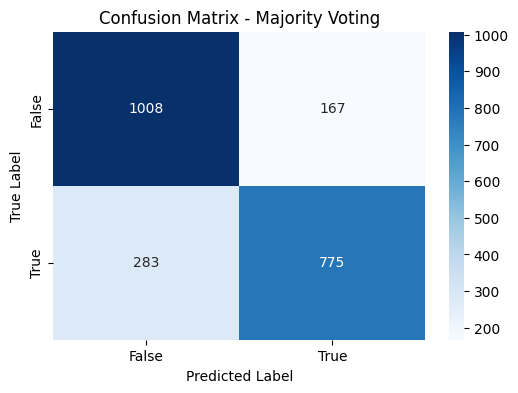

In [ ]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

# Define base models for Voting Classifier
base_models = [
    ("SVM (Linear)", SVC(kernel="linear", probability=True, random_state=42)),
    ("Random Forest", RandomForestClassifier(n_estimators=100, random_state=42)),
]

# Create Voting Classifier using hard voting
voting_clf = VotingClassifier(estimators=base_models, voting="hard")
voting_clf.fit(X_train, y_train)

# Predict on test set
y_pred = voting_clf.predict(X_test)

# Print classification report
print("\n🔹 **Classification Report:**")
print(classification_report(y_test, y_pred))

# Compute and display Accuracy and ROC-AUC
accuracy = accuracy_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)
print("\n🔹 **Evaluation Metrics:**")
print("ROC: ", roc)
print("Accuracy: ", accuracy)

# Plot Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["False", "True"], yticklabels=["False", "True"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Majority Voting")
plt.show()
